#Theoretical

# 1. What is a Decision Tree, and how does it work?
# A Decision Tree is a supervised learning algorithm used for classification and regression.
# It splits the dataset into subsets based on feature values and continues recursively until a stopping condition is met.
# The final decision is made at the leaf nodes.

# 2. What are impurity measures in Decision Trees?
# Impurity measures indicate how mixed the labels are in a node.
# The most common impurity measures are:
# - Gini Impurity (used in CART)
# - Entropy (used in ID3, C4.5)

# 3. What is the mathematical formula for Gini Impurity?
# Gini Impurity formula:
# Gini = 1 - sum(p_i^2)
# where p_i is the probability of class i in a node.

def gini_impurity(labels):
    """
    Compute the Gini Impurity of a set of labels.
    
    Parameters:
    labels (list): A list of class labels.
    
    Returns:
    float: Gini Impurity value.
    """
    from collections import Counter
    total_samples = len(labels)
    class_counts = Counter(labels)
    
    gini = 1 - sum((count / total_samples) ** 2 for count in class_counts.values())
    return gini

# Example usage:
labels = ['A', 'A', 'B', 'B', 'B', 'C']
print("Gini Impurity:", gini_impurity(labels))

# 4. What is the mathematical formula for Entropy?
# Entropy formula:
# Entropy = - sum(p_i * log2(p_i))
# where p_i is the probability of class i in a node.

import math

def entropy(labels):
    """
    Compute the Entropy of a set of labels.
    
    Parameters:
    labels (list): A list of class labels.
    
    Returns:
    float: Entropy value.
    """
    from collections import Counter
    total_samples = len(labels)
    class_counts = Counter(labels)
    
    entropy_value = -sum((count / total_samples) * math.log2(count / total_samples)
                         for count in class_counts.values() if count > 0)
    return entropy_value

# Example usage:
print("Entropy:", entropy(labels))

# 5. What is Information Gain, and how is it used in Decision Trees?
# Information Gain (IG) measures the reduction in entropy after a dataset is split on a feature.
# IG = Entropy(Parent) - Weighted Sum of Entropy(Children)

def information_gain(parent_labels, left_labels, right_labels):
    """
    Compute the Information Gain from a split.
    
    Parameters:
    parent_labels (list): Labels of the parent node.
    left_labels (list): Labels of the left child node.
    right_labels (list): Labels of the right child node.
    
    Returns:
    float: Information Gain value.
    """
    total_samples = len(parent_labels)
    weight_left = len(left_labels) / total_samples
    weight_right = len(right_labels) / total_samples
    
    return entropy(parent_labels) - (weight_left * entropy(left_labels) + weight_right * entropy(right_labels))

# Example usage:
left_split = ['A', 'A']
right_split = ['B', 'B', 'B', 'C']
print("Information Gain:", information_gain(labels, left_split, right_split))

# 6. What is the difference between Gini Impurity and Entropy?
# - Gini Impurity is easier to compute and is often used in CART.
# - Entropy involves logarithms and is used in ID3, C4.5.
# - Gini tends to favor larger classes, while Entropy is more sensitive to class distribution.

# 7. What is the mathematical explanation behind Decision Trees?
# Decision Trees use impurity measures (Gini or Entropy) to recursively split data,
# minimizing impurity at each step until a stopping condition is met.

# 8. What is Pre-Pruning in Decision Trees?
# Pre-pruning stops the tree from growing beyond a certain depth or number of nodes to prevent overfitting.

# 9. What is Post-Pruning in Decision Trees?
# Post-pruning grows the full tree first and then removes unnecessary nodes based on validation data.

# 10. What is the difference between Pre-Pruning and Post-Pruning?
# - Pre-pruning stops growth early based on conditions like max depth.
# - Post-pruning removes overfitted branches after the tree is fully grown.

# 11. What is a Decision Tree Regressor?
# A Decision Tree Regressor predicts continuous values instead of discrete labels by splitting data based on minimizing variance.

from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Example usage of DecisionTreeRegressor:
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([10, 20, 30, 40, 50])

regressor = DecisionTreeRegressor()
regressor.fit(X, y)
print("Prediction for input 3.5:", regressor.predict([[3.5]]))

# 12. What are the advantages and disadvantages of Decision Trees?
# Advantages:
# - Easy to interpret and visualize.
# - Handles both numerical and categorical data.
# - Requires little data preprocessing.
#
# Disadvantages:
# - Prone to overfitting.
# - Can be biased toward dominant classes.
# - Instability: Small data changes can cause major tree structure changes.

# 13. How does a Decision Tree handle missing values?
# - Some implementations ignore missing values in splits.
# - Others use surrogate splits to predict missing values.

# 14. How does a Decision Tree handle categorical features?
# - Uses one-hot encoding or label encoding.
# - Some Decision Tree implementations (like C4.5) handle categorical features natively.

# 15. What are some real-world applications of Decision Trees?
# - **Medical Diagnosis**: Identifying diseases based on symptoms.
# - **Customer Segmentation**: Classifying users based on behavior.
# - **Credit Scoring**: Assessing loan eligibility.
# - **Fraud Detection**: Detecting fraudulent transactions.

print("Decision Tree assignment complete!")


#PRACTICAL

In [7]:
# 1. Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy

# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate and print the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Classifier Accuracy:", accuracy)


Decision Tree Classifier Accuracy: 1.0


In [8]:
# 2. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances

# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier with Gini Impurity as the criterion
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42)

# Train the model
clf_gini.fit(X_train, y_train)

# Print the feature importances
print("Feature Importances (Gini Impurity):", clf_gini.feature_importances_)


Feature Importances (Gini Impurity): [0.         0.01667014 0.90614339 0.07718647]


In [9]:
# 3. Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy

# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier with Entropy as the criterion
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)

# Train the model
clf_entropy.fit(X_train, y_train)

# Make predictions
y_pred = clf_entropy.predict(X_test)

# Calculate and print the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Classifier Accuracy (Entropy):", accuracy)


Decision Tree Classifier Accuracy (Entropy): 1.0


In [10]:
# 4. Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE)

# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Train the model
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.495235205629094


In [11]:
# 5. Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz

# Import necessary libraries
import graphviz
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Visualize the decision tree using graphviz
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree_visualization")  # Saves to file
graph.view()  # Opens the tree visualization


'decision_tree_visualization.pdf'

In [12]:
# 6. Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree

# Import necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree Classifier with maximum depth 3
clf_depth_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_depth_3.fit(X_train, y_train)

# Train a fully grown Decision Tree Classifier
clf_full = DecisionTreeClassifier(random_state=42)
clf_full.fit(X_train, y_train)

# Predict using both models
y_pred_depth_3 = clf_depth_3.predict(X_test)
y_pred_full = clf_full.predict(X_test)

# Calculate accuracy for both models
accuracy_depth_3 = accuracy_score(y_test, y_pred_depth_3)
accuracy_full = accuracy_score(y_test, y_pred_full)

print(f"Accuracy with max_depth=3: {accuracy_depth_3}")
print(f"Accuracy with fully grown tree: {accuracy_full}")


Accuracy with max_depth=3: 1.0
Accuracy with fully grown tree: 1.0


In [13]:
# 7. Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree

# Import necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree Classifier with min_samples_split=5
clf_min_samples_split = DecisionTreeClassifier(min_samples_split=5, random_state=42)
clf_min_samples_split.fit(X_train, y_train)

# Train a default Decision Tree Classifier (without min_samples_split)
clf_default = DecisionTreeClassifier(random_state=42)
clf_default.fit(X_train, y_train)

# Predict using both models
y_pred_min_samples_split = clf_min_samples_split.predict(X_test)
y_pred_default = clf_default.predict(X_test)

# Calculate accuracy for both models
accuracy_min_samples_split = accuracy_score(y_test, y_pred_min_samples_split)
accuracy_default = accuracy_score(y_test, y_pred_default)

print(f"Accuracy with min_samples_split=5: {accuracy_min_samples_split}")
print(f"Accuracy with default tree: {accuracy_default}")


Accuracy with min_samples_split=5: 1.0
Accuracy with default tree: 1.0


In [14]:
# 8. Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data

# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree Classifier on unscaled data
clf_unscaled = DecisionTreeClassifier(random_state=42)
clf_unscaled.fit(X_train, y_train)

# Make predictions and calculate accuracy for unscaled data
y_pred_unscaled = clf_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

# Apply feature scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Decision Tree Classifier on scaled data
clf_scaled = DecisionTreeClassifier(random_state=42)
clf_scaled.fit(X_train_scaled, y_train)

# Make predictions and calculate accuracy for scaled data
y_pred_scaled = clf_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy with unscaled data: {accuracy_unscaled}")
print(f"Accuracy with scaled data: {accuracy_scaled}")


Accuracy with unscaled data: 1.0
Accuracy with scaled data: 1.0


In [15]:
# 9. Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification

# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Wrap the classifier with One-vs-Rest strategy
ovr_classifier = OneVsRestClassifier(clf)

# Train the model
ovr_classifier.fit(X_train, y_train)

# Make predictions
y_pred = ovr_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy using One-vs-Rest (OvR) strategy: {accuracy}")


Accuracy using One-vs-Rest (OvR) strategy: 1.0


In [16]:
# 10. Write a Python program to train a Decision Tree Classifier and display the feature importance scores

# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Display the feature importance scores
print("Feature Importance Scores:")
for feature, importance in zip(iris.feature_names, clf.feature_importances_):
    print(f"{feature}: {importance}")


Feature Importance Scores:
sepal length (cm): 0.0
sepal width (cm): 0.016670139612419255
petal length (cm): 0.9061433868879218
petal width (cm): 0.07718647349965893


In [17]:
# 11. Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree

# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree Regressor with max_depth=5
regressor_depth_5 = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor_depth_5.fit(X_train, y_train)

# Train an unrestricted Decision Tree Regressor
regressor_full = DecisionTreeRegressor(random_state=42)
regressor_full.fit(X_train, y_train)

# Predict and calculate the Mean Squared Error (MSE) for both models
y_pred_depth_5 = regressor_depth_5.predict(X_test)
y_pred_full = regressor_full.predict(X_test)

mse_depth_5 = mean_squared_error(y_test, y_pred_depth_5)
mse_full = mean_squared_error(y_test, y_pred_full)

print(f"Mean Squared Error with max_depth=5: {mse_depth_5}")
print(f"Mean Squared Error with unrestricted tree: {mse_full}")


Mean Squared Error with max_depth=5: 0.5245146178314735
Mean Squared Error with unrestricted tree: 0.495235205629094


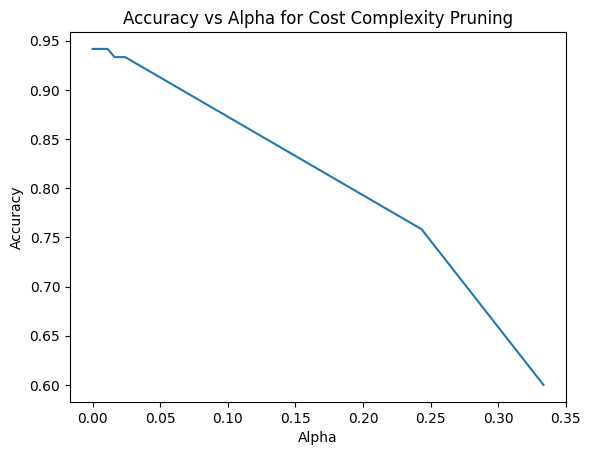

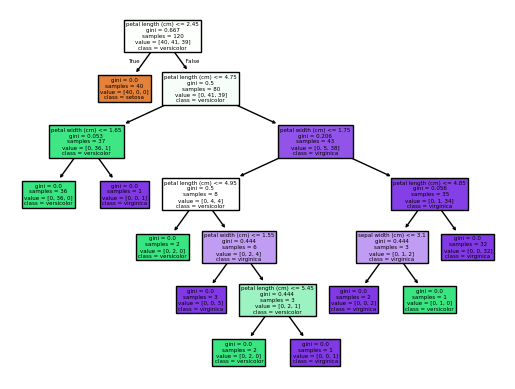

In [18]:
# 12. Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy

# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Apply Cost Complexity Pruning (CCP)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Evaluate the accuracy with different ccp_alpha values
accuracies = []
for ccp_alpha in ccp_alphas:
    clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf_pruned.fit(X_train, y_train)
    accuracies.append(cross_val_score(clf_pruned, X_train, y_train, cv=5).mean())

# Plot accuracy vs alpha
import matplotlib.pyplot as plt
plt.plot(ccp_alphas, accuracies)
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Alpha for Cost Complexity Pruning")
plt.show()

# Visualize the tree with optimal alpha
best_alpha = ccp_alphas[accuracies.index(max(accuracies))]
clf_pruned_best = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
clf_pruned_best.fit(X_train, y_train)

# Visualize the pruned tree
plot_tree(clf_pruned_best, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


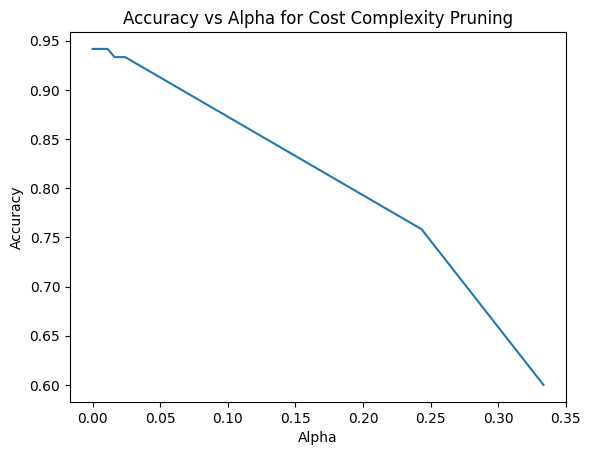

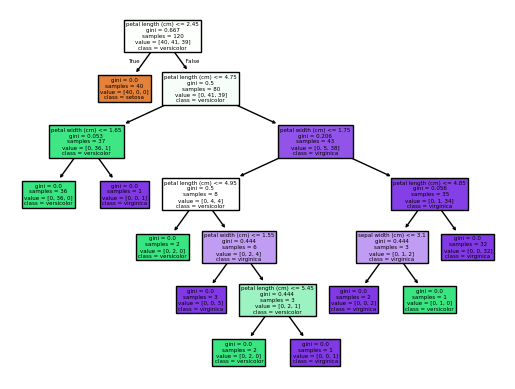

In [19]:
# 12. Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy

# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Apply Cost Complexity Pruning (CCP)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Evaluate the accuracy with different ccp_alpha values
accuracies = []
for ccp_alpha in ccp_alphas:
    clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf_pruned.fit(X_train, y_train)
    accuracies.append(cross_val_score(clf_pruned, X_train, y_train, cv=5).mean())

# Plot accuracy vs alpha
import matplotlib.pyplot as plt
plt.plot(ccp_alphas, accuracies)
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Alpha for Cost Complexity Pruning")
plt.show()

# Visualize the tree with optimal alpha
best_alpha = ccp_alphas[accuracies.index(max(accuracies))]
clf_pruned_best = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
clf_pruned_best.fit(X_train, y_train)

# Visualize the pruned tree
plot_tree(clf_pruned_best, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


In [20]:
# 13. Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score

# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Precision: 1.0
Recall: 1.0
F1-Score: 1.0


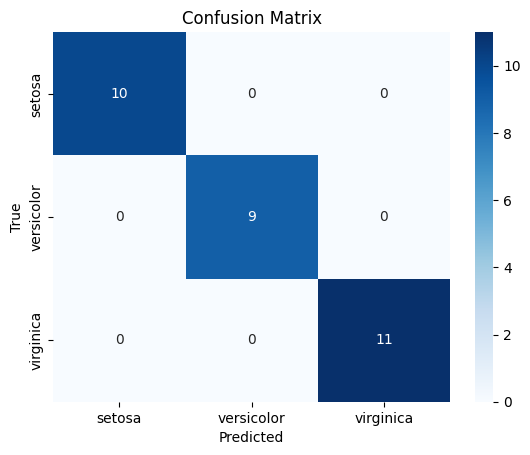

In [21]:
# 14. Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn

# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [22]:
# 15. Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split

# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f"Accuracy of the best model: {accuracy}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:  {'max_depth': 7, 'min_samples_split': 2}
Accuracy of the best model: 1.0
